# <a> *Análise Exploratória de Dados - Microdados: Matrículas de 2021 da Rede Federal de Educação Profissional* <a>

### Motivação

A análise visa desenvolver as diversas competências associadas à etapa de análise exploratória de dados:

- conhecer a distribuição das variáveis
- extrair e visualizar as medidas estatísticas principais
- observar a relação entre variáveis relevantes para a análise

Quanto à base de dados escolhida, os principais objetivos prévios são:

- analisar o perfil dos cursos ofertados
- conhecer o perfil de estudantes que se matricularam em 2021
- observar a relação entre os cursos ofertados e os estudantes matriculados

### Objeto de Estudo

A [Rede Federal](http://portal.mec.gov.br/rede-federal-inicial/) de Educação Profissional, Científica e Tecnológica, também conhecida como Rede Federal, foi criada em 2008 e contempla as seguintes instituições:
<br>
1. Institutos Federais de Educação, Ciência e Tecnologia (IFs)
<br>
2. Universidade Tecnológica Federal do Paraná
<br>
3. Cefet-RJ e Cefet-MG
<br>
4. Escolas Técnicas vinculadas às Universidades Federais
<br>
5. Colégio Pedro II
<br>
<br>

Sua constituição representou uma mudança na educação profissional e tecnológica do Brasil, contribuindo com sua ampliação, interiorização e diversificação. Tais instituições estão vinculadas ao Ministério da Educação através da Secretaria de Educação Profissional e Tecnológica (Setec/MEC).
<br>
<br>
As informações a respeito dessas instituições estão reunidas na [Plataforma Nilo Peçanha](https://www.gov.br/mec/pt-br/pnp), concebida em 2018 como um ambiente virtual de coleta, validação e disseminação das estatísticas oficiais da Rede Federal. Anualmente são divulgados microdados a respeito das matrículas, da eficiência acadêmica, dos servidores e de aspectos financeiros.
<br>
<br>
Objeto da presente análise, os dados de matrícula fornecem um panorama das alunas e alunos que estão ingressando em cursos ofertados por instituições ligadas à Rede, além de fornecer maior conhecimento sobre os próprios cursos e a posibilidade de observar relações entre as informações divulgadas.


## 1. Ajustes Iniciais na Base de Dados

In [11]:
# Carregando os pacotes que serão utilizados ao longo da análise
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import plotly.express as px
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import squarify

# Configurando pandas para exibir todas as linhas e colunas, além de não apresentar números em formato de notação científica
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Configurando estilo de gráfico no seaborn
sns.set_style('darkgrid')

In [2]:
########### CASO SEJA A PRIMEIRA VEZ RODANDO O CÓDIGO, TRANSFORMAR A BASE DE DADOS DE CSV PARA PARQUET PODE ###########
########### AJUDAR A REDUZIR O TAMANHO DO ARQUIVO ###########

# Importando arquivo CSV df_matriculas = pd.read_csv('dados_matriculas.csv', sep = ';')

# Convertendo de CSV para parquet table = pa.Table.from_pandas(df_matriculas)

# pq.write_table(table, 'dados_matriculas.parquet')

In [3]:
# Importando base de dados

df_matriculas = pd.read_parquet('dados_matriculas.parquet')

In [4]:
# Realizando uma observação inicial de parte das informações

df_matriculas.head()

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Co Inst,Cod Unidade,Cor / Raça,Código da Matricula,Código da Unidade de Ensino - SISTEC,Código do Ciclo Matricula,Código do Município com DV,Data de Fim Previsto do Ciclo,Data de Inicio do Ciclo,Data de Ocorrencia da Matricula,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Fonte de Financiamento,Idade,Instituição,Matrículas Atendida,Matrículas Equivalentes,Modalidade de Ensino,Município,Mês De Ocorrência da Situação,Nome de Curso,Número de registros,Região,Renda Familiar,Sexo,Situação de Matrícula,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Total de Inscritos,Turno,UF,Unidade de Ensino,Vagas Extraordinárias AC,Vagas Extraordinárias l1,Vagas Extraordinárias l10,Vagas Extraordinárias l13,Vagas Extraordinárias l14,Vagas Extraordinárias l2,Vagas Extraordinárias l5,Vagas Extraordinárias l6,Vagas Extraordinárias l9,Vagas Ofertadas,Vagas Regulares AC,Vagas Regulares l1,Vagas Regulares l10,Vagas Regulares l13,Vagas Regulares l14,Vagas Regulares l2,Vagas Regulares l5,Vagas Regulares l6,Vagas Regulares l9
0,200,200.00,Evadidos,262432,557,Amarela,96176470,3479.00,2716099,2407104,21/12/2020,31/08/2020,01/08/2020,Informação e Comunicação,50 a 54 anos,"1,1",Sem Programa Associado,54.00,UFRN - EAJ,Sim,"0,275",Educação a Distância,Macaíba,01/03/2021,Programador de Dispositivos Móveis,1,Região Nordeste,"0,5<RFP<=1,0",Feminino,Reprovado,Informática,Qualificação Profissional (FIC),Não se aplica,NaN,Não se aplica,RN,Escola Agrícola de Jundiaí da UFRN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,850.00,850.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,160,160.00,Em curso,26436,6002,Amarela,102483972,45430.00,2830452,4314407,20/02/2022,01/12/2021,01/12/2021,Gestão e Negócios,45 a 49 anos,"1,1",Sem Programa Associado,49.00,IFSUL,Sim,"0,22",Educação a Distância,Pelotas,01/12/2021,Recepcionista,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Gestão e Negócios,Qualificação Profissional (FIC),Não se aplica,2834.00,Não se aplica,RS,Centro de Referência Pelotas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2834.00,2834.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,160,160.00,Em curso,26436,6002,Amarela,102459282,45430.00,2830437,4314407,20/02/2022,01/12/2021,01/12/2021,Desenvolvimento Educacional e Social,45 a 49 anos,"1,1",Sem Programa Associado,49.00,IFSUL,Sim,"0,22",Educação a Distância,Pelotas,01/12/2021,Agente de Projetos Sociais,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Desenvolvimento Social,Qualificação Profissional (FIC),Não se aplica,1234.00,Não se aplica,RS,Centro de Referência Pelotas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1234.00,1234.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,40,160.00,Em curso,26419,116,Amarela,97887414,2936.00,2745532,4302105,31/01/2021,01/01/2021,01/01/2021,Ambiente e Saúde,40 a 44 anos,"1,1",Outros MOOC,44.00,IFRS,Sim,"0,055",Educação a Distância,Bento Gonçalves,None,Qualificação Profissional - Ambiente e Saúde,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Ambiente e Saúde,Qualificação Profissional (FIC),Concomitante,265.00,Não se aplica,RS,Campus Bento Gonçalves,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,265.00,265.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1380,1200.00,Em curso,26404,436,Amarela,91646798,2947.00,2632269,2927903,22/01/2021,22/07/2019,01/07/2019,Desenvolvimento Educacional e Social,40 a 44 anos,1,Sem Programa Associado,43.00,IF BAIANO,Sim,1,Educação a Distância,Santa Inês,01/07/2019,Técnico em Secretaria Escolar,1,Região Nordeste,"0,5<RFP<=1,0",Feminino,Em curso,Desenvolvimento Educacional,Técnico,Subsequente,NaN,Não se aplica,BA,Campus Santa Inês,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
df_matriculas.shape

(1523346, 56)

In [6]:
df_matriculas.dtypes

Carga Horaria                             int64
Carga Horaria Mínima                    float64
Categoria da Situação                    object
Co Inst                                   int64
Cod Unidade                               int64
Cor / Raça                               object
Código da Matricula                       int64
Código da Unidade de Ensino - SISTEC    float64
Código do Ciclo Matricula                 int64
Código do Município com DV                int64
Data de Fim Previsto do Ciclo            object
Data de Inicio do Ciclo                  object
Data de Ocorrencia da Matricula          object
Eixo Tecnológico                         object
Faixa Etária                             object
Fator Esforço Curso                      object
Fonte de Financiamento                   object
Idade                                   float64
Instituição                              object
Matrículas Atendida                      object
Matrículas Equivalentes                 

In [7]:
# Ajustando coluna de Fator de Esforço para que passe a ser interpretada como numérica

df_matriculas['Fator Esforço Curso'] = pd.to_numeric(df_matriculas['Fator Esforço Curso'].str.replace(',', ''))

In [8]:
# Selecionando colunas que não serão utilizadas na análise

colunas_codigos = [coluna for coluna in df_matriculas.columns if ('Código' in coluna) or ('Cod' in coluna) or ('Co Inst' in coluna)]

colunas_vagas = [coluna for coluna in df_matriculas.columns if ('Extraordinárias' in coluna)
                or ('Regulares' in coluna)]

colunas_codigos + colunas_vagas

['Co Inst',
 'Cod Unidade',
 'Código da Matricula',
 'Código da Unidade de Ensino - SISTEC',
 'Código do Ciclo Matricula',
 'Código do Município com DV',
 'Vagas Extraordinárias AC',
 'Vagas Extraordinárias l1',
 'Vagas Extraordinárias l10',
 'Vagas Extraordinárias l13',
 'Vagas Extraordinárias l14',
 'Vagas Extraordinárias l2',
 'Vagas Extraordinárias l5',
 'Vagas Extraordinárias l6',
 'Vagas Extraordinárias l9',
 'Vagas Regulares AC',
 'Vagas Regulares l1',
 'Vagas Regulares l10',
 'Vagas Regulares l13',
 'Vagas Regulares l14',
 'Vagas Regulares l2',
 'Vagas Regulares l5',
 'Vagas Regulares l6',
 'Vagas Regulares l9']

In [9]:
# Retirando estas colunas da base de dados

df_matriculas = df_matriculas.drop(colunas_codigos + colunas_vagas, axis = 1)

df_matriculas.head()

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Cor / Raça,Data de Fim Previsto do Ciclo,Data de Inicio do Ciclo,Data de Ocorrencia da Matricula,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Fonte de Financiamento,Idade,Instituição,Matrículas Atendida,Matrículas Equivalentes,Modalidade de Ensino,Município,Mês De Ocorrência da Situação,Nome de Curso,Número de registros,Região,Renda Familiar,Sexo,Situação de Matrícula,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Total de Inscritos,Turno,UF,Unidade de Ensino,Vagas Ofertadas
0,200,200.00,Evadidos,Amarela,21/12/2020,31/08/2020,01/08/2020,Informação e Comunicação,50 a 54 anos,11,Sem Programa Associado,54.00,UFRN - EAJ,Sim,"0,275",Educação a Distância,Macaíba,01/03/2021,Programador de Dispositivos Móveis,1,Região Nordeste,"0,5<RFP<=1,0",Feminino,Reprovado,Informática,Qualificação Profissional (FIC),Não se aplica,NaN,Não se aplica,RN,Escola Agrícola de Jundiaí da UFRN,850.00
1,160,160.00,Em curso,Amarela,20/02/2022,01/12/2021,01/12/2021,Gestão e Negócios,45 a 49 anos,11,Sem Programa Associado,49.00,IFSUL,Sim,"0,22",Educação a Distância,Pelotas,01/12/2021,Recepcionista,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Gestão e Negócios,Qualificação Profissional (FIC),Não se aplica,2834.00,Não se aplica,RS,Centro de Referência Pelotas,2834.00
2,160,160.00,Em curso,Amarela,20/02/2022,01/12/2021,01/12/2021,Desenvolvimento Educacional e Social,45 a 49 anos,11,Sem Programa Associado,49.00,IFSUL,Sim,"0,22",Educação a Distância,Pelotas,01/12/2021,Agente de Projetos Sociais,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Desenvolvimento Social,Qualificação Profissional (FIC),Não se aplica,1234.00,Não se aplica,RS,Centro de Referência Pelotas,1234.00
3,40,160.00,Em curso,Amarela,31/01/2021,01/01/2021,01/01/2021,Ambiente e Saúde,40 a 44 anos,11,Outros MOOC,44.00,IFRS,Sim,"0,055",Educação a Distância,Bento Gonçalves,None,Qualificação Profissional - Ambiente e Saúde,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Ambiente e Saúde,Qualificação Profissional (FIC),Concomitante,265.00,Não se aplica,RS,Campus Bento Gonçalves,265.00
4,1380,1200.00,Em curso,Amarela,22/01/2021,22/07/2019,01/07/2019,Desenvolvimento Educacional e Social,40 a 44 anos,1,Sem Programa Associado,43.00,IF BAIANO,Sim,1,Educação a Distância,Santa Inês,01/07/2019,Técnico em Secretaria Escolar,1,Região Nordeste,"0,5<RFP<=1,0",Feminino,Em curso,Desenvolvimento Educacional,Técnico,Subsequente,NaN,Não se aplica,BA,Campus Santa Inês,40.00


## 2. Analisando os Cursos Ofertados

In [10]:
# Verificando as principais modalidades de ensino ofertadas

df_matriculas['Modalidade de Ensino'].value_counts(normalize = True)*100

Educação Presencial    55.22
Educação a Distância   44.78
Name: Modalidade de Ensino, dtype: float64

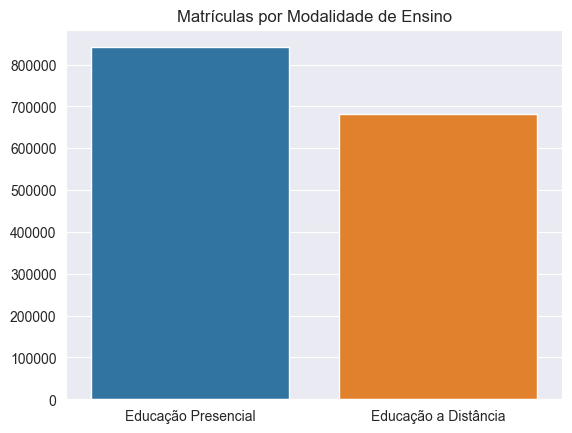

In [11]:
sns.countplot(data = df_matriculas, x = 'Modalidade de Ensino',
              order = df_matriculas['Modalidade de Ensino'].value_counts(normalize = True).index)
plt.title('Matrículas por Modalidade de Ensino')
plt.ylabel('')
plt.xlabel('')

plt.show()

In [12]:
# Distribuição de matrículas por eixo tecnológico do curso

df_matriculas['Eixo Tecnológico'].value_counts(normalize = True)*100

Desenvolvimento Educacional e Social   27.14
Gestão e Negócios                      15.76
Informação e Comunicação               14.50
Controle e Processos Industriais        9.94
Recursos Naturais                       8.64
Ambiente e Saúde                        7.07
Infraestrutura                          4.29
Produção Alimentícia                    3.16
Turismo, Hospitalidade e Lazer          2.73
Produção Cultural e Design              2.38
Produção Industrial                     2.31
Segurança                               1.15
Propedêutico                            0.93
Name: Eixo Tecnológico, dtype: float64

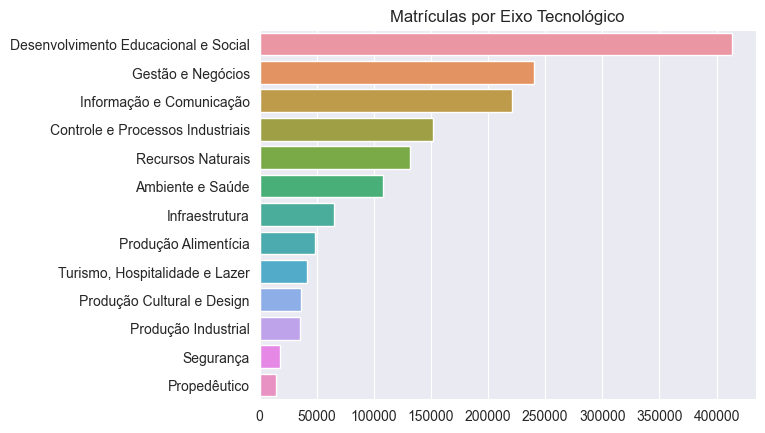

In [13]:
sns.countplot(data = df_matriculas, y = 'Eixo Tecnológico',order = df_matriculas['Eixo Tecnológico'].value_counts().index)
plt.ylabel('')
plt.xlabel('')
plt.title('Matrículas por Eixo Tecnológico')

plt.show()

In [14]:
# Na sequência, observando a relação entre o eixo tecnológico e a modalidade de ensino
df_eixo_modalidade = df_matriculas.groupby('Eixo Tecnológico')['Modalidade de Ensino'].value_counts().reset_index(name = 'Matriculados')

ordem_eixo = df_eixo_modalidade.groupby('Eixo Tecnológico')['Matriculados'].sum().sort_values(ascending = False).index

df_eixo_modalidade['Eixo Tecnológico'] = pd.Categorical(df_eixo_modalidade['Eixo Tecnológico'], categories = ordem_eixo, ordered=True)

df_eixo_modalidade.sort_values(by='Eixo Tecnológico', inplace=True)


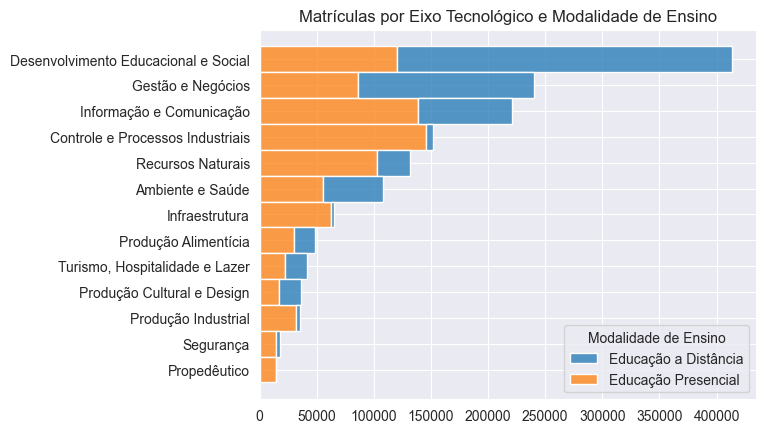

In [15]:
sns.histplot(data = df_eixo_modalidade, y = 'Eixo Tecnológico', weights = 'Matriculados', hue = 'Modalidade de Ensino',
            multiple = 'stack')
plt.title('Matrículas por Eixo Tecnológico e Modalidade de Ensino')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [16]:
# Analisando distribuição das matrículas pelo tipo de curso ofertado

df_matriculas_curso = df_matriculas['Tipo de Curso'].value_counts().reset_index()
df_matriculas_curso.columns = ['Tipo de Curso', 'Matriculados']

df_matriculas_curso

,Tipo de Curso,Matriculados
0,Qualificação Profissional (FIC),623440
1,Técnico,500230
2,Bacharelado,128247
3,Licenciatura,103546
4,Tecnologia,94658
5,Especialização (Lato Sensu),49583
6,Ensino Médio,6823
7,Mestrado Profissional,5956
8,Ensino Fundamental II,4668
9,Mestrado,2807


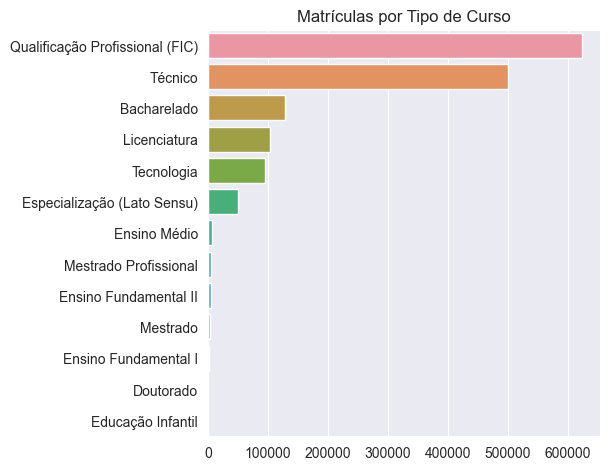

In [17]:
sns.barplot(data = df_matriculas_curso, y = 'Tipo de Curso', x = 'Matriculados')
plt.tight_layout()
plt.xlabel('')
plt.ylabel('')
plt.title('Matrículas por Tipo de Curso')

plt.show()

In [18]:
# Calculando a carga horária média por cada tipo de curso e relacionando com o número de matrículas

df_carga_curso = df_matriculas.groupby('Tipo de Curso')['Carga Horaria'].mean().sort_values(ascending = False).reset_index()
df_carga_curso.rename(columns = {'Carga Horaria' : 'Carga Horaria Media'}, inplace = True)
df_matriculas_carga = df_matriculas_curso.merge(df_carga_curso, on = 'Tipo de Curso')

df_matriculas_carga

,Tipo de Curso,Matriculados,Carga Horaria Media
0,Qualificação Profissional (FIC),623440,100.83
1,Técnico,500230,2709.32
2,Bacharelado,128247,3830.93
3,Licenciatura,103546,3285.21
4,Tecnologia,94658,2301.29
5,Especialização (Lato Sensu),49583,434.22
6,Ensino Médio,6823,3429.05
7,Mestrado Profissional,5956,513.91
8,Ensino Fundamental II,4668,4426.87
9,Mestrado,2807,518.96


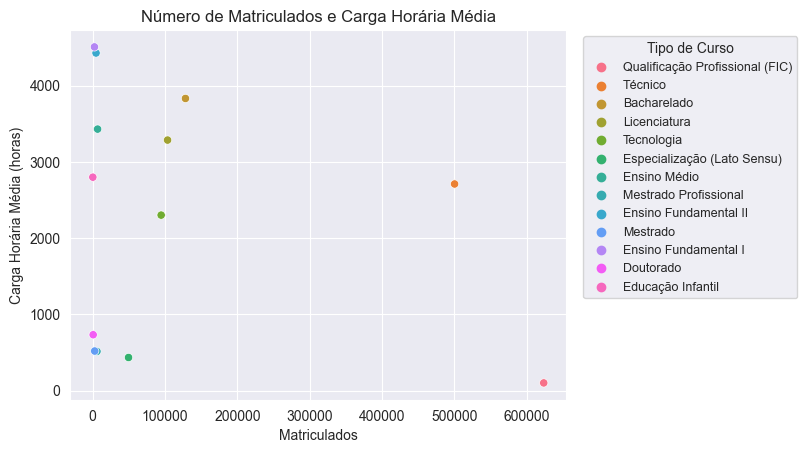

In [19]:
sns.scatterplot(data = df_matriculas_carga, x = 'Matriculados', y = 'Carga Horaria Media', hue = 'Tipo de Curso', legend = 'brief')
plt.title('Número de Matriculados e Carga Horária Média')
plt.ylabel('Carga Horária Média (horas)')
plt.legend(title = 'Tipo de Curso', loc = 'upper center', fontsize = 9, bbox_to_anchor = (1.25, 1.00))

plt.show()

In [20]:
matriculas_turno = df_matriculas.groupby(['Tipo de Curso', 'Turno']).size().reset_index(name = 'Matriculados')

ordem_curso = matriculas_turno.groupby('Tipo de Curso')['Matriculados'].sum().sort_values(ascending = False).index

matriculas_turno['Tipo de Curso'] = pd.Categorical(matriculas_turno['Tipo de Curso'], categories = ordem_curso, ordered = True)

matriculas_turno.sort_values('Tipo de Curso', inplace = True)

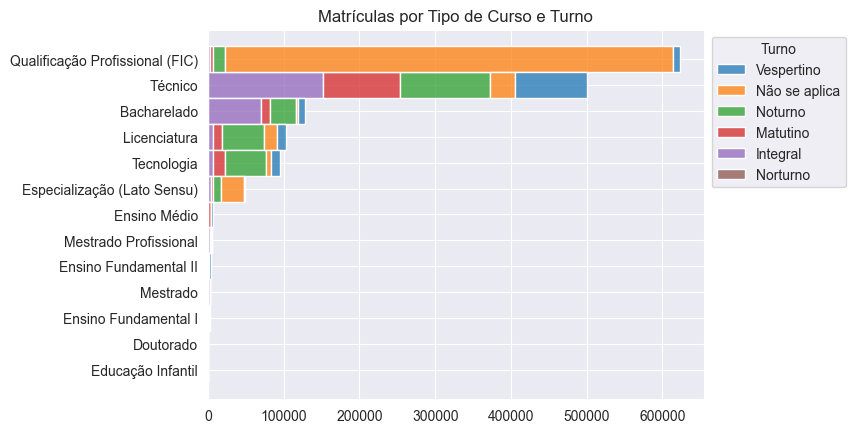

In [21]:
# Observando a distribuição de cursos por turno
ax = sns.histplot(data = matriculas_turno, y = 'Tipo de Curso', weights = 'Matriculados', hue = 'Turno', multiple = 'stack')
sns.move_legend(ax, "upper right", bbox_to_anchor = (1.30,1))
plt.title('Matrículas por Tipo de Curso e Turno')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [22]:
# Em seguidda, observando a relação entre tipo de curso e a modalidade de ensino para as matrículas

df_curso_modalidade = df_matriculas.groupby('Tipo de Curso')['Modalidade de Ensino'].value_counts().reset_index(name = 'Matriculados')

df_curso_modalidade['Tipo de Curso'] = pd.Categorical(df_curso_modalidade['Tipo de Curso'], categories = ordem_curso ,ordered = True)

df_curso_modalidade.sort_values('Tipo de Curso', inplace = True)

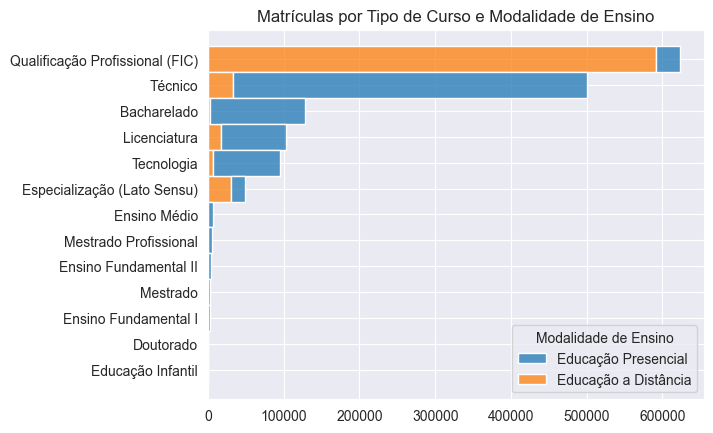

In [23]:
ax = sns.histplot(data = df_curso_modalidade, y = 'Tipo de Curso', weights = 'Matriculados', hue = 'Modalidade de Ensino', multiple = 'stack')
sns.move_legend(ax, 'lower right')
plt.title('Matrículas por Tipo de Curso e Modalidade de Ensino')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [24]:
# Estimando número de instituições que ofertam cada tipo de curso

ofertantes = df_matriculas.groupby('Tipo de Curso')['Instituição'].nunique().reset_index(name = 'Ofertantes').sort_values(by = 'Ofertantes', ascending = False)

ofertantes

,Tipo de Curso,Ofertantes
12,Técnico,64
10,Qualificação Profissional (FIC),48
11,Tecnologia,42
6,Especialização (Lato Sensu),41
7,Licenciatura,41
9,Mestrado Profissional,41
0,Bacharelado,40
8,Mestrado,18
1,Doutorado,10
5,Ensino Médio,10


In [25]:
# Considerando que somente uma instituição oferta três tipos de cursos, é feita uma seleção para comparar somente cursos que
# possuem no mínimo mais de um ofertante

cursos = ofertantes.iloc[:10, 0].to_list()

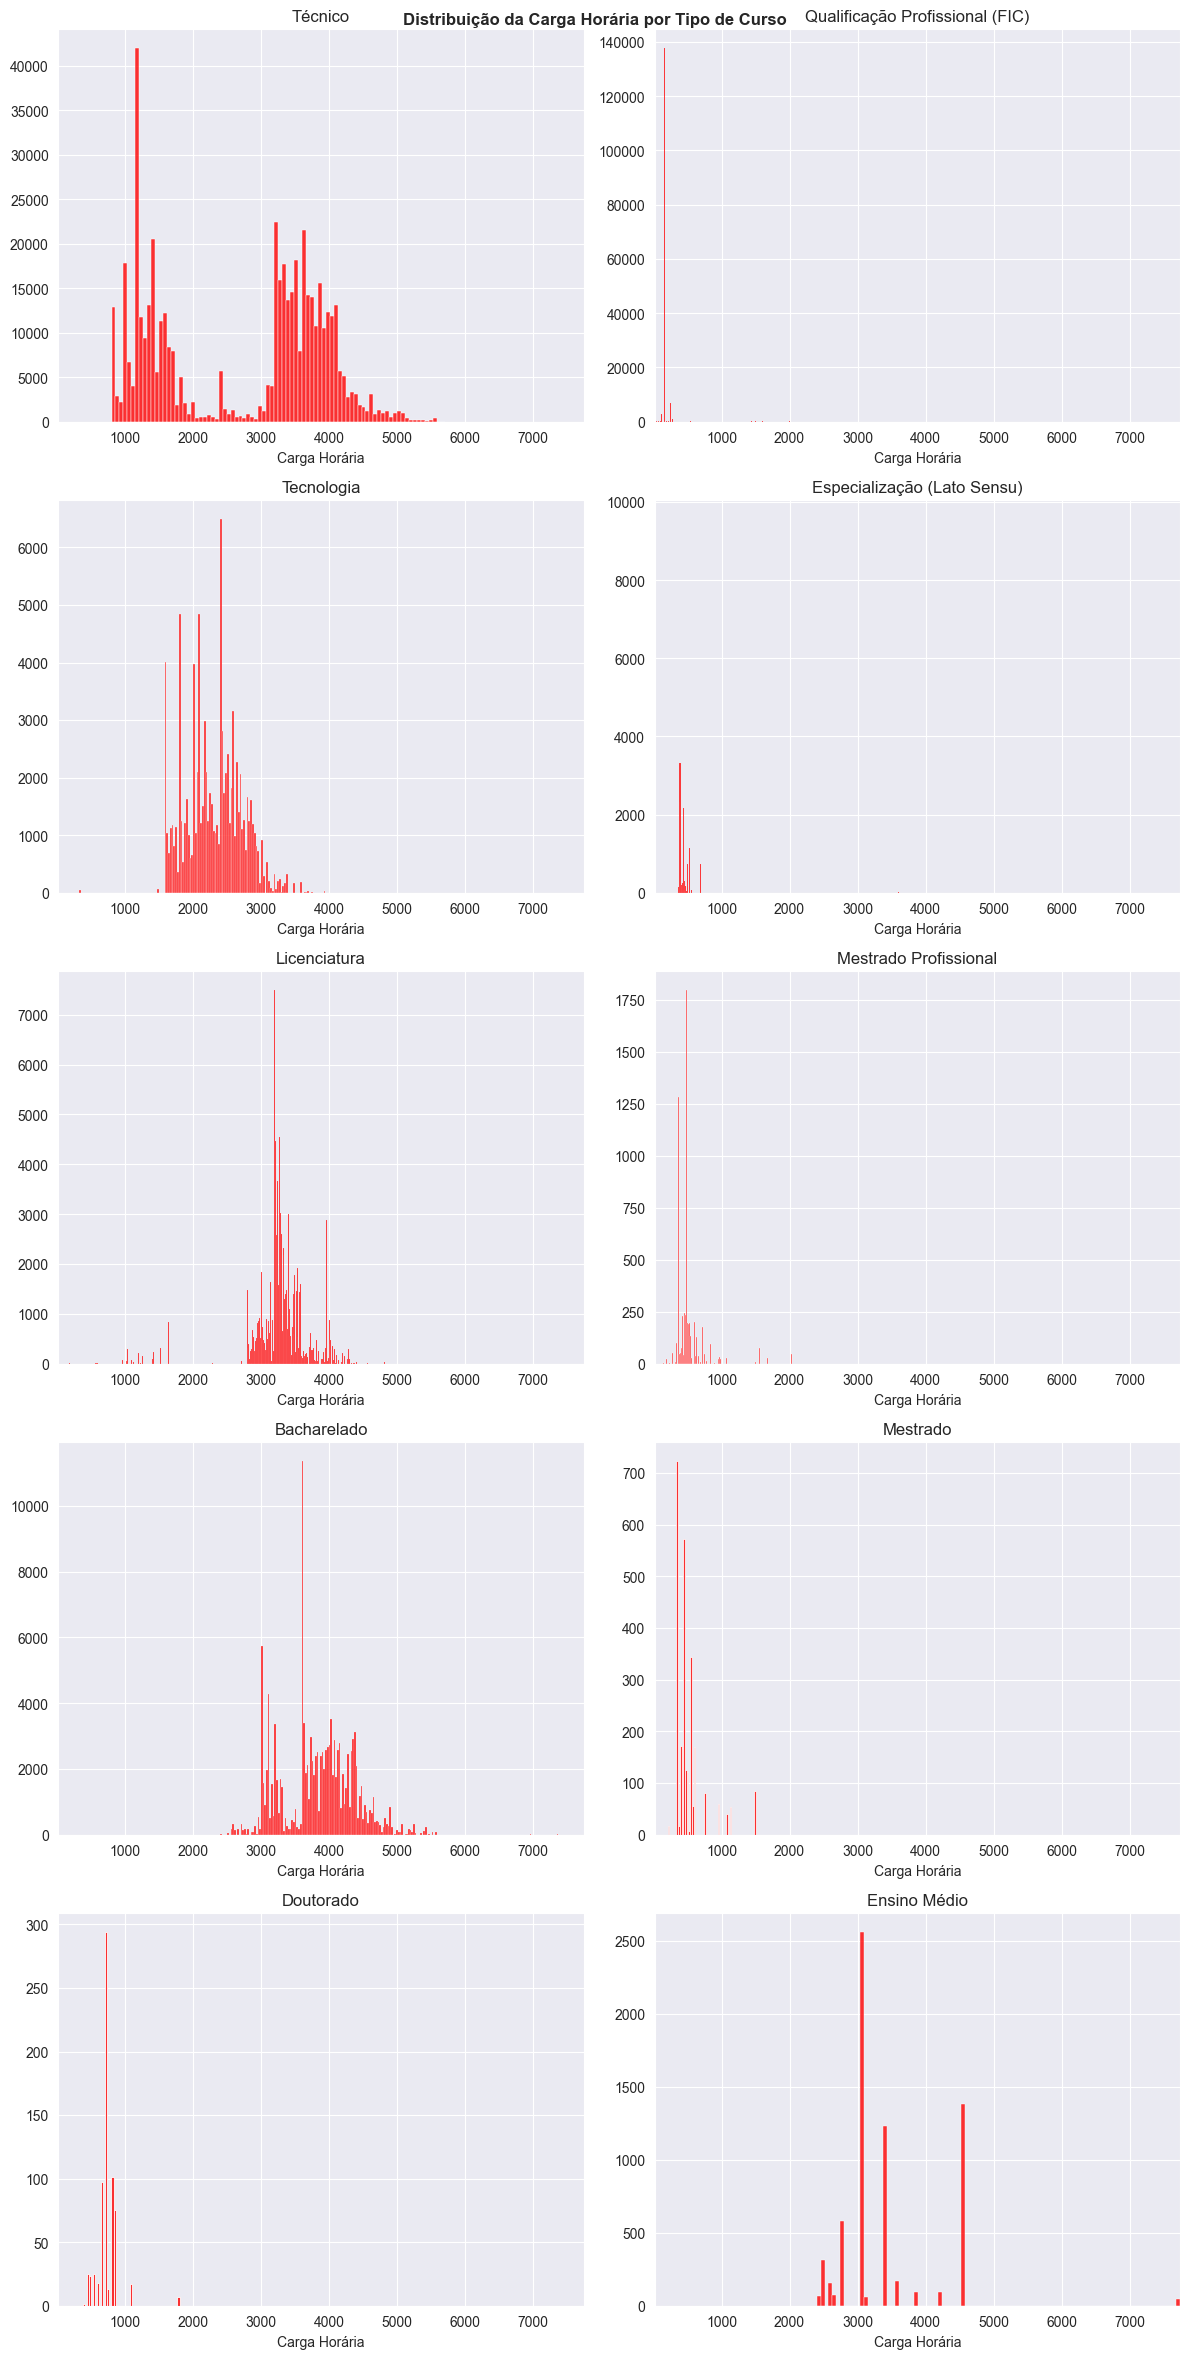

In [26]:
# Selecionando somente matrículas cuja carga horária esteja preenchida
df_cargahoraria = df_matriculas[df_matriculas['Carga Horaria'] > 0]

# Plotando gráfico com a distribuição da carga horária para cada um dos tipos de curso
fig, ax = plt.subplots(5, 2, figsize=(12, 24))
ax = ax.ravel()

for i, curso in enumerate(cursos):
    sns.histplot(df_cargahoraria.loc[df_cargahoraria['Tipo de Curso'] == curso, 'Carga Horaria'], ax=ax[i % 10], kde=False,
                color = 'red', alpha = 0.8)
    ax[i % 10].set_title(curso)
    ax[i % 10].set_xlim(df_cargahoraria['Carga Horaria'].min(), df_cargahoraria['Carga Horaria'].max())
    ax[i % 10].set_xlabel('Carga Horária')
    ax[i % 10].set_ylabel('')
    
plt.suptitle('Distribuição da Carga Horária por Tipo de Curso', fontweight = 'bold')
plt.tight_layout()
plt.show()

Analisar o fator de esforço permite uma comparação em termos da relação entre quantos alunos são alocados por professor. Para uma variável deste tipo, é esperado que níveis mais avançados de educação possuam menor oferta de vagas e uma relação mais próxima de 1:1.

![Dicionário - Fator de Esforço](dicionario_fatordeesforco.png)

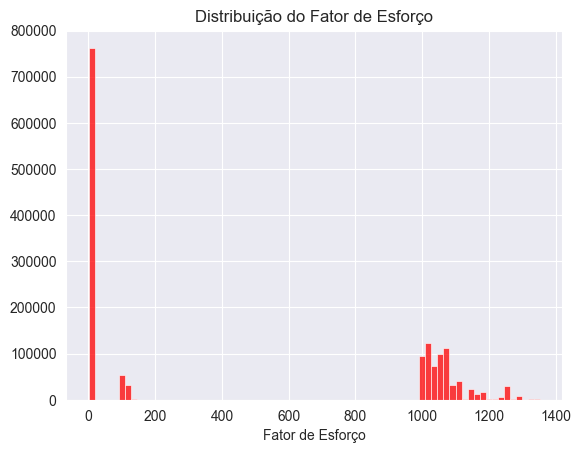

In [27]:
# Analisando a distribuição do fator de esforço atribuído aos cursos
sns.histplot(data = df_matriculas, x = 'Fator Esforço Curso', color = 'red')
plt.title('Distribuição do Fator de Esforço')
plt.ylabel('')
plt.xlabel('Fator de Esforço')

plt.show()

In [28]:
# Calculado o Fator de Esforço Médio por Tipo de Curso

fator_esforco = df_matriculas[df_matriculas['Tipo de Curso'].isin(cursos)]
fator_esforco = fator_esforco.groupby('Tipo de Curso')['Fator Esforço Curso'].mean().sort_values(ascending = False).to_frame()
fator_esforco.rename(columns = {'Fator Esforço Curso' : 'Fator Esforço Médio'}, inplace = True)

fator_esforco

,Fator Esforço Médio
Tipo de Curso,
Ensino Médio,1067.00
Bacharelado,1025.89
Licenciatura,954.58
Técnico,881.93
Tecnologia,480.31
Qualificação Profissional (FIC),14.26
Especialização (Lato Sensu),2.18
Doutorado,1.00
Mestrado,1.00


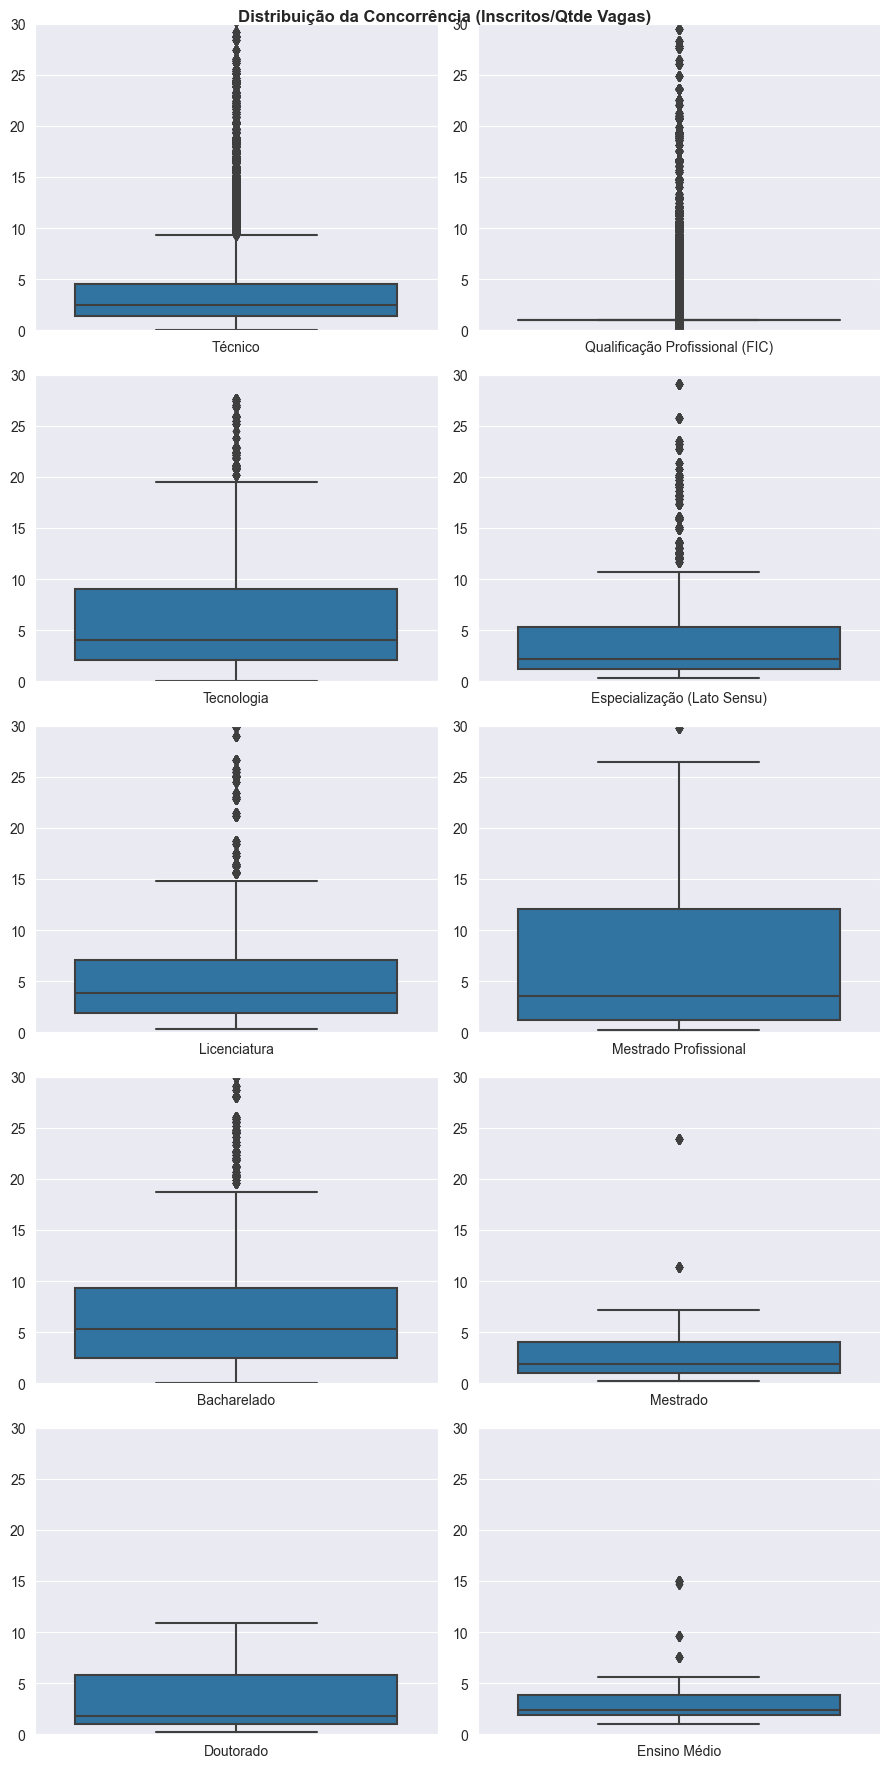

In [29]:
# Calculando e visualizando a relação de candidatos por vaga

df_matriculas['Concorrencia'] = df_matriculas['Total de Inscritos']/df_matriculas['Vagas Ofertadas']

fig, ax = plt.subplots(5, 2, figsize=(9, 18))
ax = ax.flatten()

for i, curso in enumerate(cursos):
    sub_data = df_matriculas[df_matriculas['Tipo de Curso'] == curso]
    sns.boxplot(x = 'Tipo de Curso', y = 'Concorrencia', data = sub_data, ax = ax[i])
    ax[i].set_ylim(0, 30)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    
plt.suptitle('Distribuição da Concorrência (Inscritos/Qtde Vagas)', fontweight = 'bold')
plt.tight_layout()
plt.show()

## 3. Analisando Aspectos Demográficos

In [30]:
# Analisando o sexo das pessoas matriculadas

df_matriculas['Sexo'].value_counts(normalize = True)

Feminino    0.55
Masculino   0.45
S/I         0.00
Name: Sexo, dtype: float64

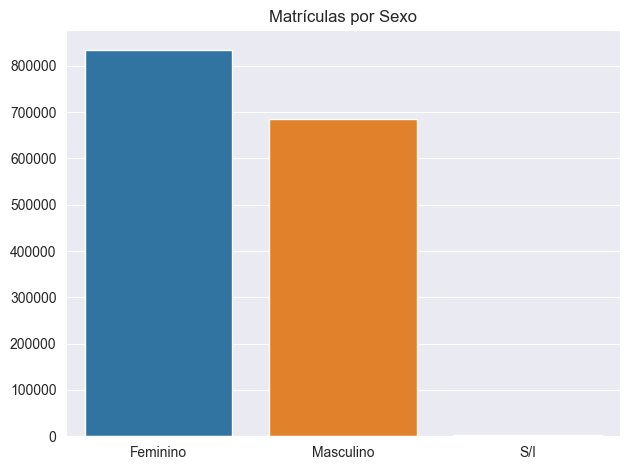

In [31]:
sns.countplot(data = df_matriculas, x = 'Sexo')
plt.title('Matrículas por Sexo')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

plt.show()

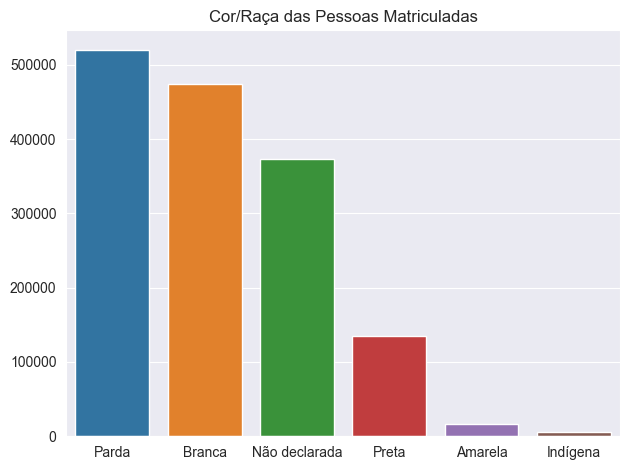

In [32]:
# Analisando a cor/raça das pessoas matriculadas

sns.countplot(data = df_matriculas, x = 'Cor / Raça',
              order = df_matriculas['Cor / Raça'].value_counts().index)
plt.title('Cor/Raça das Pessoas Matriculadas')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

plt.show()

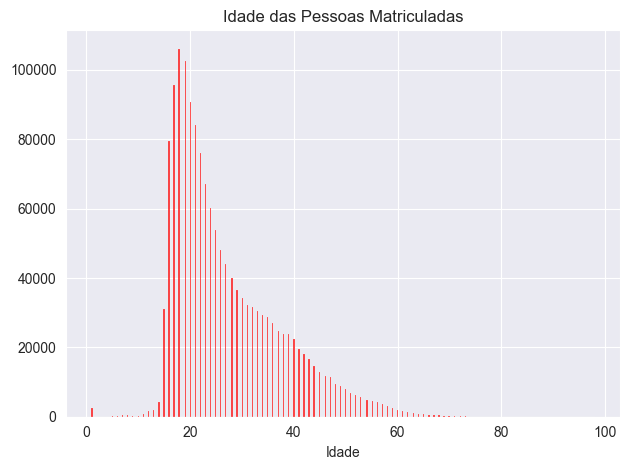

In [33]:
# Calculando e visualizando a distribuição etária das pessoas matriculadas

df_idades = df_matriculas[(df_matriculas['Idade'] > 0) & (df_matriculas['Idade'] < 100)]

sns.histplot(data = df_idades, x = 'Idade', color = 'red')
plt.title('Idade das Pessoas Matriculadas')
plt.ylabel('')
plt.tight_layout()

plt.show()

In [34]:
# Calculando as faixas de renda mais comuns entre os matriculados

df_matriculas['Renda Familiar'].value_counts()

Não declarada    642777
0<RFP<=0,5       248110
0,5<RFP<=1,0     209736
1,0<RFP<=1,5     168496
1,5<RFP<=2,5     121290
RFP>3,5           78635
2,5<RFP<=3,5      54302
Name: Renda Familiar, dtype: int64

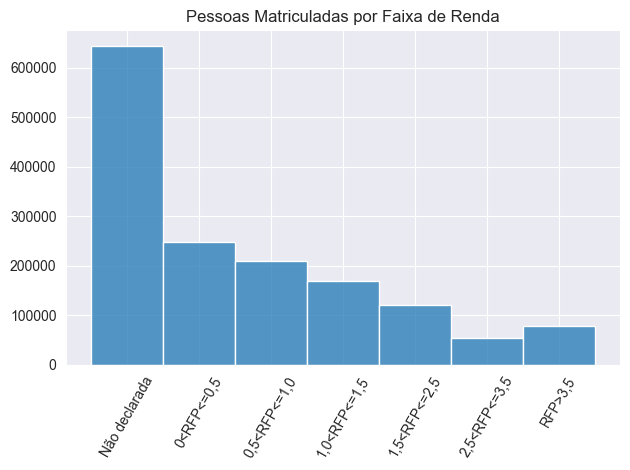

In [35]:
# Estabelecendo uma ordenação para a variável de faixa de renda
df_matriculas['Renda Familiar'] = pd.Categorical(df_matriculas['Renda Familiar'],
                                                 categories = ['Não declarada', '0<RFP<=0,5', '0,5<RFP<=1,0',
                                                       '1,0<RFP<=1,5', '1,5<RFP<=2,5', '2,5<RFP<=3,5', 'RFP>3,5'], ordered = True)

# Visualizando a distribuição por faixa de renda
sns.histplot(data = df_matriculas, x = 'Renda Familiar')
plt.title('Pessoas Matriculadas por Faixa de Renda')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 60)
plt.tight_layout()

plt.show()

In [36]:
# Verificando distribuição geográfica das pessoas matriculadas
df_matriculas['Região'].value_counts(normalize = True)

Região Sul            0.36
Região Nordeste       0.25
Região Sudeste        0.22
Região Centro-Oeste   0.10
Região Norte          0.08
Name: Região, dtype: float64

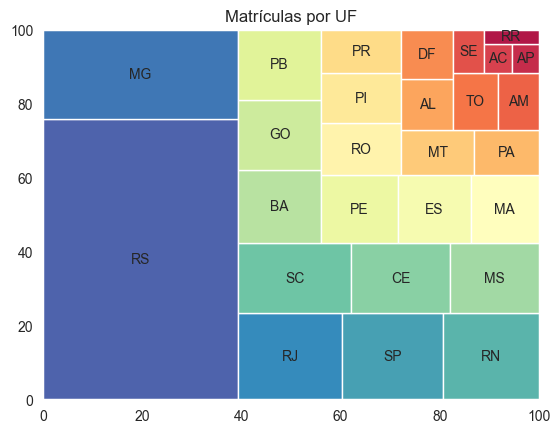

In [37]:
# Calculando quantidade de matrículas por estado
uf_alunos = df_matriculas['UF'].value_counts().to_frame().reset_index()
uf_alunos.rename(columns = {'index' : 'UF', 'UF' : 'Matriculados'}, inplace = True)

squarify.plot(sizes = uf_alunos['Matriculados'], label = uf_alunos['UF'],
              color = sns.color_palette('Spectral_r', len(uf_alunos)))
plt.title('Matrículas por UF')

plt.show()

## 4. Relacionando Cursos Ofertados e Variáveis Demográficas  

Nesta etapa o objetivo é verificar se existe um perfil de estudante distinto entre os cursos com relação a:

- Sexo
- Cor/Raça
- Idade
- Renda Familiar
- Situação do Aluno

In [38]:
#  Analisando a composição de sexo por tipo de curso
genero_curso = df_matriculas.groupby(['Tipo de Curso', 'Sexo']).size().reset_index(name = 'Matriculas')

total_genero_curso = genero_curso.groupby('Tipo de Curso')['Matriculas'].sum().reset_index()
total_genero_curso.rename(columns = {'Matriculas': 'Total Matriculas'}, inplace = True)

juncao_genero_curso = pd.merge(genero_curso, total_genero_curso, on = 'Tipo de Curso')
juncao_genero_curso['Percentual'] = juncao_genero_curso['Matriculas']/juncao_genero_curso['Total Matriculas']


juncao_genero_curso['Tipo de Curso'] = pd.Categorical(juncao_genero_curso['Tipo de Curso'], categories = ordem_curso, ordered = True)
juncao_genero_curso.sort_values('Tipo de Curso', inplace = True)


juncao_genero_curso.head()

,Tipo de Curso,Sexo,Matriculas,Total Matriculas,Percentual
30,Qualificação Profissional (FIC),S/I,2466,623440,0.00
29,Qualificação Profissional (FIC),Masculino,227325,623440,0.36
28,Qualificação Profissional (FIC),Feminino,393649,623440,0.63
36,Técnico,S/I,98,500230,0.00
34,Técnico,Feminino,254743,500230,0.51


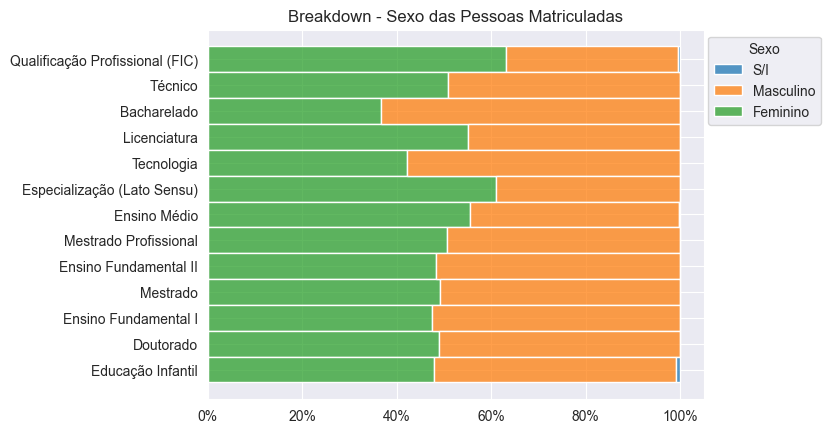

In [39]:
ax = sns.histplot(data = juncao_genero_curso, y = 'Tipo de Curso', weights = 'Percentual', hue = 'Sexo', multiple = 'stack')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

sns.move_legend(ax, "upper right", bbox_to_anchor = (1.25,1))
plt.title('Breakdown - Sexo das Pessoas Matriculadas')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [40]:
df_raca_matriculas = df_matriculas.groupby(['Cor / Raça', 'Tipo de Curso']).size().reset_index(name = 'Matriculados').sort_values(by = ['Tipo de Curso', 'Cor / Raça'], ascending = False)
df_raca_matriculas['Matriculados_Normalizado'] = df_raca_matriculas.groupby('Tipo de Curso')['Matriculados'].transform(lambda x: x/x.sum())

df_raca_matriculas['Tipo de Curso'] = pd.Categorical(df_raca_matriculas['Tipo de Curso'], categories = ordem_curso, ordered = True)
df_raca_matriculas.sort_values('Tipo de Curso', inplace = True)

df_raca_matriculas.head()

,Cor / Raça,Tipo de Curso,Matriculados,Matriculados_Normalizado
22,Branca,Qualificação Profissional (FIC),193388,0.31
46,Não declarada,Qualificação Profissional (FIC),198217,0.32
59,Parda,Qualificação Profissional (FIC),167907,0.27
72,Preta,Qualificação Profissional (FIC),55395,0.09
9,Amarela,Qualificação Profissional (FIC),6828,0.01


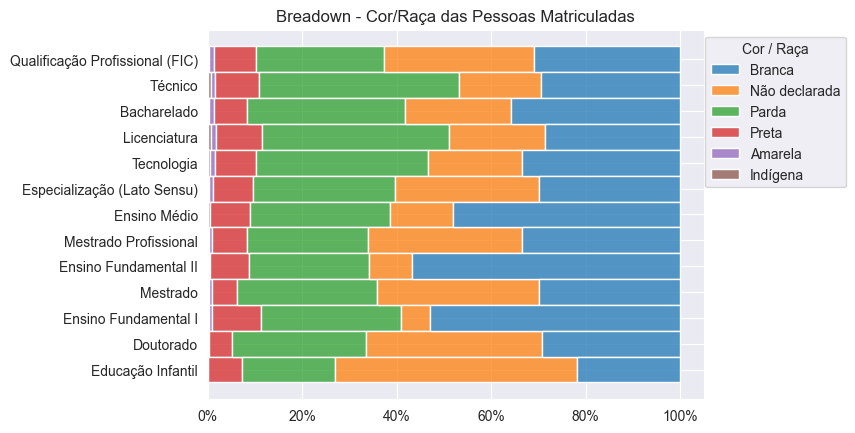

In [41]:
ax = sns.histplot(data = df_raca_matriculas, y  = "Tipo de Curso", weights = "Matriculados_Normalizado", hue = 'Cor / Raça', multiple = 'stack')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

sns.move_legend(ax, 'upper right', bbox_to_anchor = (1.3,1))
plt.title('Breadown - Cor/Raça das Pessoas Matriculadas')
plt.xlabel('')
plt.ylabel('')
plt.show()

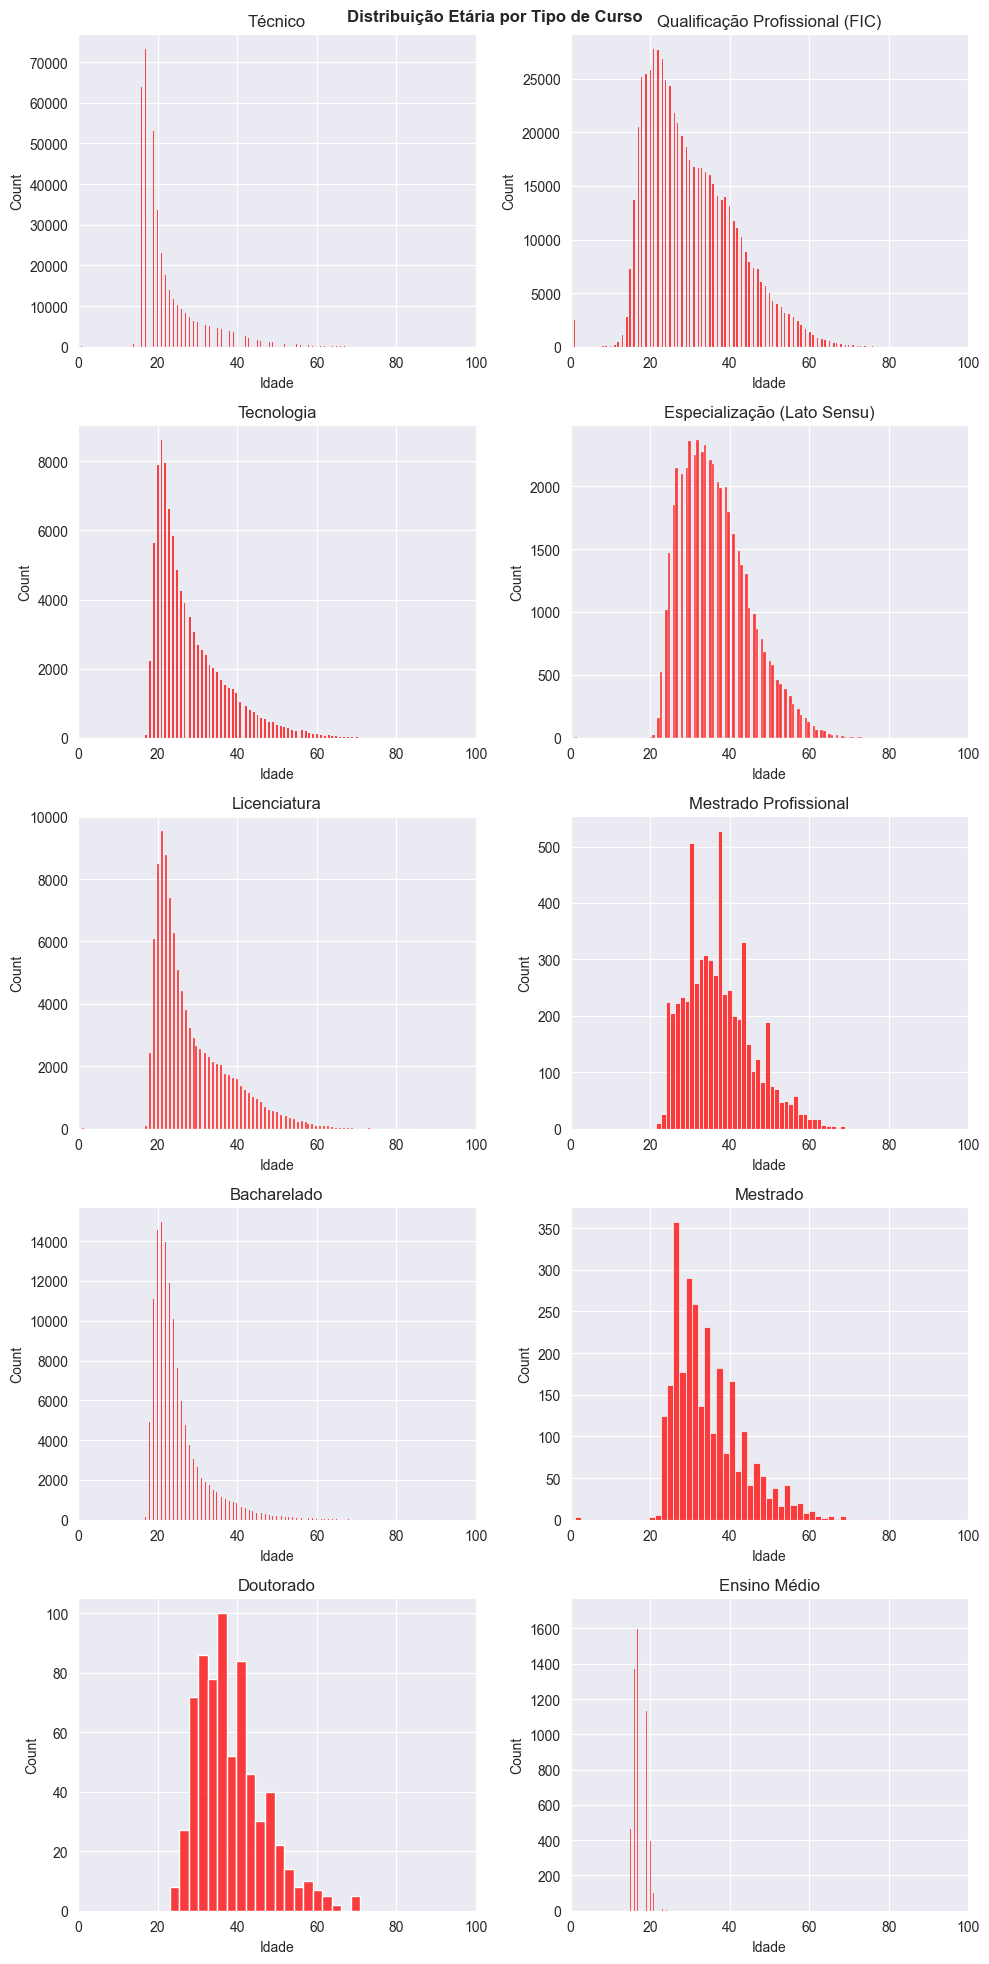

In [42]:
# Observando a relação entre idade das pessoas matriculadas e tipo de curso

fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = ax.flatten()
for i, curso in enumerate(cursos):
    sub_data = df_matriculas[df_matriculas['Tipo de Curso'] == curso]
    sns.histplot(x = 'Idade', data = sub_data, ax = ax[i], color = 'red')
    ax[i].set_xlim(0,100)
    ax[i].set_title(curso)
plt.suptitle('Distribuição Etária por Tipo de Curso', fontweight = 'bold')
plt.tight_layout()
plt.show()

In [43]:
# Observando relação entre renda familiar e o tipo de curso matriculado

curso_rendafamiliar = df_matriculas.groupby(['Tipo de Curso', 'Renda Familiar']).size().reset_index(name = 'Matriculados')
curso_rendafamiliar['Pct_Matriculados'] = curso_rendafamiliar.groupby('Tipo de Curso')['Matriculados'].transform(lambda x: x/x.sum())

curso_rendafamiliar['Tipo de Curso'] = pd.Categorical(curso_rendafamiliar['Tipo de Curso'], categories = ordem_curso, ordered = True)
curso_rendafamiliar.sort_values('Tipo de Curso', inplace = True)

curso_rendafamiliar.head()

,Tipo de Curso,Renda Familiar,Matriculados,Pct_Matriculados
76,Qualificação Profissional (FIC),"RFP>3,5",39431,0.06
75,Qualificação Profissional (FIC),"2,5<RFP<=3,5",27137,0.04
74,Qualificação Profissional (FIC),"1,5<RFP<=2,5",57925,0.09
73,Qualificação Profissional (FIC),"1,0<RFP<=1,5",66967,0.11
72,Qualificação Profissional (FIC),"0,5<RFP<=1,0",61562,0.10


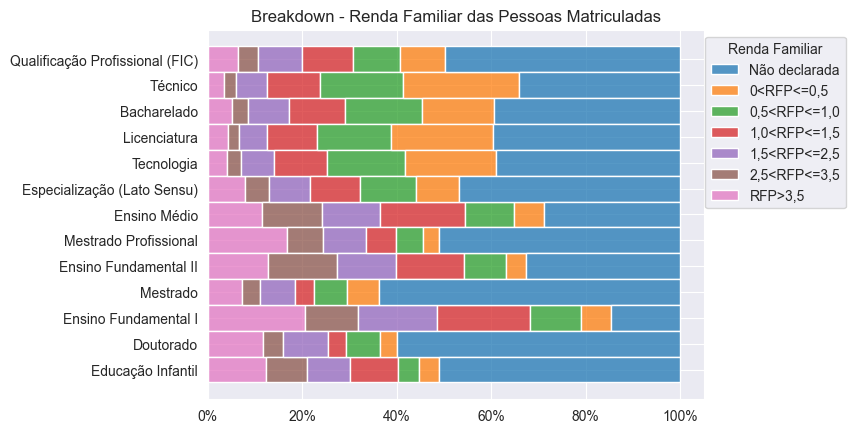

In [44]:
ax = sns.histplot(data = curso_rendafamiliar, y = 'Tipo de Curso', weights = 'Pct_Matriculados', hue = 'Renda Familiar', multiple = 'stack')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

sns.move_legend(ax, 'upper right', bbox_to_anchor = (1.3, 1))
plt.title('Breakdown - Renda Familiar das Pessoas Matriculadas')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [45]:
# Transformando colunas categóricas em númericas para viabilizar cálculo de correlação de Pearson: 
# colunas: região, faixa de renda, categoria da situação

df_matriculas['Região_Num'] = df_matriculas['Região'].factorize()[0]
df_matriculas['RendaFamiliar_Num'] = df_matriculas['Renda Familiar'].factorize()[0]
df_matriculas['SituaçãoMatricula_Num'] = df_matriculas['Categoria da Situação'].factorize()[0]

df_matriculas.head()

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Cor / Raça,Data de Fim Previsto do Ciclo,Data de Inicio do Ciclo,Data de Ocorrencia da Matricula,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Fonte de Financiamento,Idade,Instituição,Matrículas Atendida,Matrículas Equivalentes,Modalidade de Ensino,Município,Mês De Ocorrência da Situação,Nome de Curso,Número de registros,Região,Renda Familiar,Sexo,Situação de Matrícula,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Total de Inscritos,Turno,UF,Unidade de Ensino,Vagas Ofertadas,Concorrencia,Região_Num,RendaFamiliar_Num,SituaçãoMatricula_Num
0,200,200.00,Evadidos,Amarela,21/12/2020,31/08/2020,01/08/2020,Informação e Comunicação,50 a 54 anos,11,Sem Programa Associado,54.00,UFRN - EAJ,Sim,"0,275",Educação a Distância,Macaíba,01/03/2021,Programador de Dispositivos Móveis,1,Região Nordeste,"0,5<RFP<=1,0",Feminino,Reprovado,Informática,Qualificação Profissional (FIC),Não se aplica,NaN,Não se aplica,RN,Escola Agrícola de Jundiaí da UFRN,850.00,NaN,0,0,0
1,160,160.00,Em curso,Amarela,20/02/2022,01/12/2021,01/12/2021,Gestão e Negócios,45 a 49 anos,11,Sem Programa Associado,49.00,IFSUL,Sim,"0,22",Educação a Distância,Pelotas,01/12/2021,Recepcionista,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Gestão e Negócios,Qualificação Profissional (FIC),Não se aplica,2834.00,Não se aplica,RS,Centro de Referência Pelotas,2834.00,1.00,1,0,1
2,160,160.00,Em curso,Amarela,20/02/2022,01/12/2021,01/12/2021,Desenvolvimento Educacional e Social,45 a 49 anos,11,Sem Programa Associado,49.00,IFSUL,Sim,"0,22",Educação a Distância,Pelotas,01/12/2021,Agente de Projetos Sociais,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Desenvolvimento Social,Qualificação Profissional (FIC),Não se aplica,1234.00,Não se aplica,RS,Centro de Referência Pelotas,1234.00,1.00,1,0,1
3,40,160.00,Em curso,Amarela,31/01/2021,01/01/2021,01/01/2021,Ambiente e Saúde,40 a 44 anos,11,Outros MOOC,44.00,IFRS,Sim,"0,055",Educação a Distância,Bento Gonçalves,None,Qualificação Profissional - Ambiente e Saúde,1,Região Sul,"0,5<RFP<=1,0",Feminino,Em curso,Ambiente e Saúde,Qualificação Profissional (FIC),Concomitante,265.00,Não se aplica,RS,Campus Bento Gonçalves,265.00,1.00,1,0,1
4,1380,1200.00,Em curso,Amarela,22/01/2021,22/07/2019,01/07/2019,Desenvolvimento Educacional e Social,40 a 44 anos,1,Sem Programa Associado,43.00,IF BAIANO,Sim,1,Educação a Distância,Santa Inês,01/07/2019,Técnico em Secretaria Escolar,1,Região Nordeste,"0,5<RFP<=1,0",Feminino,Em curso,Desenvolvimento Educacional,Técnico,Subsequente,NaN,Não se aplica,BA,Campus Santa Inês,40.00,NaN,0,0,1


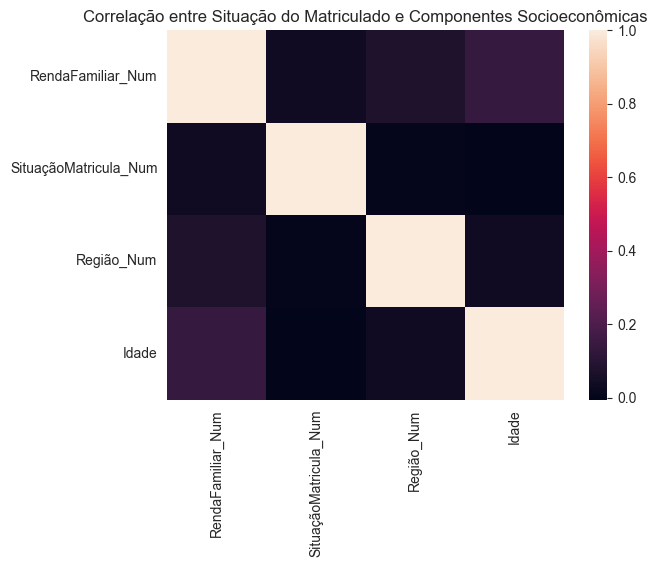

In [46]:
# Verificando a correlação entre a situação da matrícula (foco em saber o que pode afetar evasão) e componentes sociodemográficos

colunas_correlacoes = df_matriculas.loc[:, ['RendaFamiliar_Num', 'SituaçãoMatricula_Num', 'Região_Num', 'Idade']]

correlacoes = colunas_correlacoes.corr()
sns.heatmap(correlacoes)
plt.title('Correlação entre Situação do Matriculado e Componentes Socioeconômicas')
plt.show()

## Conclusões

- A Rede Federal contempla 13 tipos de curso distintos, mas somente o Colégio Pedro II, oferta cursos no nível infantil e fundamental. Além disso, o ensino médio e superior possui uma oferta mais restrita se comparada com o número de matrículas registradas para curso de caráter profissionalizante.
<br>
<br>
<br>
- A maior parte dos alunos da Rede Federal se matriculou em cursos presenciais, mas os dois eixos tecnológicos com mais inscritos (Desenvolvimento Educacional e Social, Gestão e Negócios) possuíam a maior parte dos alunos estudando remotamente.
<br>
<br>
<br>
- Quanto aos tipos de curso com mais alunos matriculados, os de Formação Inicial e Continuada (FIC) e os Técnicos concentram a grande maioria das observações. Entretanto, uma análise considerando carga horária média e os turnos de estudo mais comuns apontam para perfis bens distintos entre as duas categorias; a FIC, abrangendo cursos especiais, de livre oferta, abertos à comunidade e de qualificação profissional, teve alunos matriculados quase que complementamente em um regime remoto, enquanto o nível Técnico apresentou cenário oposto, sendo uma modalidade majoritariamente presencial e com uma divisão bem grande entre os regimes integral, matutino, noturno e vespertino.
<br>
<br>
<br>
- A métrica de fator de esforço nos informa que, em média, cursos de pós graduação apresentam uma relação aluno: professor muito reduzida se comparada a cursos como Técnico, Bacharelado, Licenciatura e Tecnologia. Estes mesmos cursos também aparentam possuir maior nível de concorrência quando tomada como base o número de vagas ofertas. Neste sentido, chama a atenção a variabilidade da concorrência entre os cursos FIC, com diversos outliers sendo observados na distribuição.
<br>
<br>
<br>
- Quanto à demografia, o perfil mais comum de estudante que se matriculou em 2021 foi de mulheres, pardas, com 18 anos de idade, e possuindo até meio salário mínimo de renda familiar. Em termos geográficos, os estados do Rio Grande do Sul e de Minas Gerais concentram uma parcela significativa dos estudantes; dentre os matriculados, aproximadamente 1 em cada 3 era da Região Sul, 1 em cada 4 era da região Nordeste e 1 em cada 5 era da região Sudeste.
<br>
<br>
<br>
- Ao analisar aspectos demográficos com relação aos cursos ofertados, é possível perceber que as mulheres representam mais de 60% das pessoas matriculadas em cursos FIC, além de representarem aproximadamente 51% das matrículas em cursos técnicos os dois mais representativos da Rede. Os homens são maioria principalmente no bacharelado e em cursos de Tecnologia.
<br>
<br>
<br>
- Em termos etários as distribuições apresentam comportamento esperado, com cursos técnico e bacharelado concentrando pessoas na faixa dos 18 anos e pós graduações tendo matriculados de idade mais avançada. A maior variabilidade pode ser observada nos cursos FIC, que apesar de possuir média semelhante aos demais, são mais dispersos.